<h1>Analisis exploratorio de datos</h1>

En el siguiente notebook se van a analizar los datos del dataset <b>Melbourne Housing Snapshot</b>, el cual contiene información sobre las viviendas en Melbourne, Australia. Las variables que componen el dataset son:

<table>
    <tr>
        <th> Nombre variable </th>
        <th> Descripción </th>
    </tr>
    <tr>
        <td> Suburb </td>
        <td> Suburbio </td>
    </tr>
    <tr>
        <td> Address </td>
        <td> Dirección </td>
    </tr>
    <tr>
        <td> Rooms </td>
        <td> Número de recamaras </td>
    </tr>
    <tr>
        <td> Type </td>
        <td> Variable categórica que representa el tipo de vivienda, los valores que puede tomar son: br - habitación(es); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; sitio de desarrollo; o res - otro tipo residencial. </td>
    </tr>
    <tr>
        <td> Method </td>
        <td> Variable categórica que representa la situación de una casa, los valores que puede tomar son: S - propiedad vendida; SP - propiedad vendida con anterioridad; PI - propiedad traspasada; PN - vendida con anterioridad no divulgada; SN - vendida no revelada; NB - sin oferta; VB - oferta del vendedor; W - retirada antes de la subasta; SA - vendida después de la subasta; SS - vendida después de la subasta precio no divulgado. N/A - precio u oferta más alta no disponible. </td>
    </tr>
    <tr>
        <td> SellerG </td>
        <td> Agencia de Bienes Raíces </td>
    </tr>
    <tr>
        <td> Date </td>
        <td> Fecha de venta</td>
    </tr>
    <tr>
        <td> Distance </td>
        <td> Distancia (en km) al distrito central de negocios (CBD), es decir, calles comerciales principales y edificios públicos</td>
    </tr>
    <tr>
        <td> Postcode </td>
        <td> Código postal </td>
    </tr>
    <tr>
        <td> Bedroom2 </td>
        <td> Número de recamaras <i>scraped</i> (de diferente fuente) </td>
    </tr>
    <tr>
        <td> Bathroom </td>
        <td> Número de baños</td>
    </tr>
    <tr>
        <td> Car </td>
        <td> Número de espacios para vehículos  </td>
    </tr>
    <tr>
        <td> Landsize </td>
        <td> Área en metros cuadrados del terreno </td>
    </tr>
    <tr>
        <td> BuildingArea </td>
        <td> Área en metros cuadrados de la construcción </td>
    </tr>
    <tr>
        <td> YearBuilt </td>
        <td> Antigüedad de la casa </td>
    </tr>
    <tr>
        <td> CouncilArea </td>
        <td> Ciudad </td>
    </tr>
    <tr>
        <td> Lattitude </td>
        <td> Latitud </td>
    </tr>
    <tr>
        <td> Longtitude </td>
        <td> Longitud  </td>
    </tr>
    <tr>
        <td> Regionname </td>
        <td> Nombre de la región (norte, sur, este, oeste, ...) </td>
    </tr>
    <tr>
        <td> Propertycount </td>
        <td> Número de propiedades que existen en el suburbio </td>
    </tr>
    <tr>
        <td> <b> Price </b> </td>
        <td> <b> Precio de la construcción en dolares </b> </td>
    </tr>
<table>

Fuente: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download

In [ ]:
#!pip install pandas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Si ejecutan el notebook de forma local, deben comentar las líneas de esta celda.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga e información general del dataset

In [ ]:
# Si ejecutan el notebook de forma local, actualizar la ruta donde se encuentra el archivo
df = pd.read_csv('./drive/MyDrive/ML/melb_data.csv')

In [ ]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.tail(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [ ]:
print(f'El dataset tiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas (variables)')

El dataset tiene 13580 filas (registros) y 21 columnas (variables)


# Limpieza de datos

<h3> Datos nulos </h3>

Dentro del análisis de los datos, lo primero que se tiene que revisar es si el dataset tiene <b>datos nulos</b>.

1. Método <b>info</b>
</br>
2. Método <b>isnull</b>
</br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
count_null = df.isnull().sum()
cols_null = count_null[count_null > 0]
cols_null = (cols_null / df.shape[0]) * 100
display(cols_null)

,0
Car,0.456554
BuildingArea,47.496318
YearBuilt,39.580265
CouncilArea,10.081001


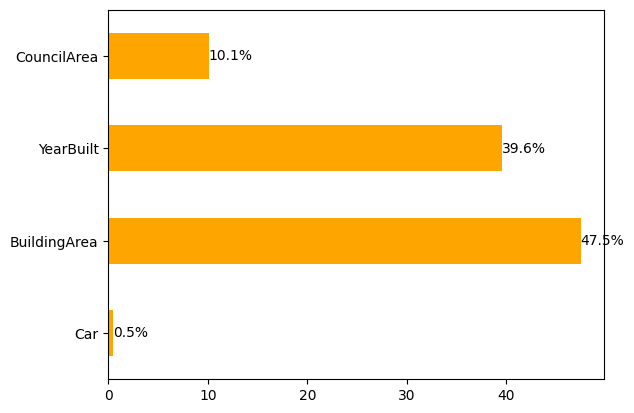

In [ ]:
ax = cols_null.plot.barh(color='orange', rot=0)
ax = ax.bar_label(ax.containers[0], fmt='%.1f%%')

In [ ]:
# Se elimina BuildingArea por su alto porcentaje de faltantes (47.5%) y correlación moderada (0.5) con Landsize.
# No obstante, se sugiere entrenar dos modelos uno sin BuildingArea y otro con Landsize + BuildingArea imputada

df_delcol = df.drop(['BuildingArea'], axis=1)

### Identificar los diferentes tipos de variables

In [ ]:
# Variables numéricas discretas
lst_disvar = list(df_delcol.select_dtypes(include='int')) + ['Bedroom2', 'Bathroom', 'Car', 'Propertycount']
print(f'Variables numéricas discretas\n{lst_disvar}')
# Variables categóricas
lst_catvar = list(df_delcol.select_dtypes(include='object')) + ['Postcode']
print(f'Variables categóricas\n{lst_catvar}')
# Variables numéricas continuas
lst_contvar = list(set(df_delcol.columns)-set(lst_catvar).union(set(lst_disvar)))
print(f'Variables numéricas continuas\n{lst_contvar}')

Variables numéricas discretas
['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Propertycount']
Variables categóricas
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'Postcode']
Variables numéricas continuas
['YearBuilt', 'Longtitude', 'Lattitude', 'Price', 'Distance', 'Landsize']


<h1> Datos faltantes </h1>

Antes de hacer cualquier evaluación sobre los datos es importante realizar siempre un tratamiento previo con el fin de abordar el problema de los datos faltantes. Cabe mencionar que en ocasiones no existen valores faltantes o nulos, sin embargo existen valores en cero, los cuales pueden reflejar datos faltantes.

A continuación se indican algunas técnicas para reemplazar los datos faltantes:

En caso de identificar que existen valores nulos en el dataset, se deben realizar acciones para solucionar el problema. Existen diferentes métodos, sin embargo los más comunes son:

<ol>
    <li> Medidas generales </li>
    <ol>
        <li> Eliminar las muestras (filas) en caso de que se tengan varios valores nulos en la fila, o si falta un dato que es muy relevante. </li>
        <li> Eliminar las características (columnas) en caso de que varios registros no tengan esa información. </li>
    </ol>
    <li> Variables categoricas </li>
    <ol>
        <li> Agregar una categoría que indique la falta de información. </li>
        <li> Reemplazar por un valor constante, tal como la media, mediana o moda de la variable </li>
        <li> Asignación aleatoria de categorías escogiendo las que se encuentran presentes en la variable, distribución uniforme. </li>
    </ol>
    <li> Variables numéricas </li>
    <ol>
        <li> Reemplazar por un valor constante, tal como la media, mediana o moda de la variable </li>
    </ol>
</ol>

In [ ]:
# Columnas que tienen valor cero
(df_delcol==0).sum(axis=0)

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,6
Postcode,0


Las variables con las que se va a trabajar son *Car*, la cual tiene 0 y *YearBuilt*, que tiene NaN.

In [ ]:
cols_nan = ['Car', 'YearBuilt']

<h3>Eliminar variables (columnas) / registros (filas) con valores faltantes</h3>

Es una de las estrategias más sencilla, ya que se eliminan los registros que contienen un valor NaN o null.

Para eliminar una columna o fila con **pandas**, se emplea la función **drop**. Sus parámetros son:
<center>
    drop(column(s), axis)
</center>

Si es una columna se coloca entre comillas. Para nuestro caso, se va a omitir la variable *BuildingArea* pues el 47% del dataset no cuenta con este dato. Por otro lado, si se va a borrar una columna se le asigna 1 al parametros *axis*, en el caso de que sea una fila, es 0, pero es el valor por default.

Otro método para borrar filas de nulos es **dropna**.

<center>
    dropna(axis)
</center>

In [ ]:
df_delcol = df.drop('BuildingArea', axis = 1)
#df_delrow = df.drop(df.index[2:4])
#df_delmask = df.drop(df[df.Distance==0].index)

In [ ]:
df_delcol.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df_dropr_null = df.dropna()
df_dropc_null = df.dropna(axis=1)
print(f'Original {df.shape}\nEliminando filas con nulos {df_dropr_null.shape}\nEliminando columnas con nulos {df_dropc_null.shape}')

Original (13580, 21)
Eliminando filas con nulos (6196, 21)
Eliminando columnas con nulos (13580, 17)


# Reemplazo con valores constantes

Primero se reemplazan los ceros con valores NaN

In [ ]:
df_nan = df_delcol[cols_nan].copy()
df_nan['Car'] = df_nan['Car'].replace(0, np.nan)

In [ ]:
# Validando que sólo hay NaN en el dataframe
df_nan.head(10)

,Car,YearBuilt
0,1.0,NaN
1,NaN,1900.0
2,NaN,1900.0
3,1.0,NaN
4,2.0,2014.0
5,NaN,NaN
6,NaN,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


<h2>Media</h2>

Para calcular la media se usa el método <i>mean</i>

In [ ]:
df_media_nan = df_nan.copy()
df_media_nan.mean()

,0
Car,1.742315
YearBuilt,1964.684217


In [ ]:
display(df_media_nan.head(10))

,Car,YearBuilt
0,1.0,NaN
1,NaN,1900.0
2,NaN,1900.0
3,1.0,NaN
4,2.0,2014.0
5,NaN,NaN
6,NaN,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


Reemplazando valores NaN por la media

In [ ]:
df_media_nan = df_media_nan.mask(df_media_nan.isna(), df_media_nan.mean().round(), axis=1)
display(df_media_nan.head(10))

,Car,YearBuilt
0,1.0,1965.0
1,2.0,1900.0
2,2.0,1900.0
3,1.0,1965.0
4,2.0,2014.0
5,2.0,1965.0
6,2.0,1910.0
7,2.0,1890.0
8,1.0,1965.0
9,2.0,1900.0


<h2>Moda</h2>

Para calcular la moda se usa el método <i>mode</i>

In [ ]:
df_moda_nan = df_nan.copy()
df_moda_nan.mode()

,Car,YearBuilt
0,2.0,1970.0


In [ ]:
display(df_moda_nan.head(10))

,Car,YearBuilt
0,1.0,NaN
1,NaN,1900.0
2,NaN,1900.0
3,1.0,NaN
4,2.0,2014.0
5,NaN,NaN
6,NaN,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


Reemplazando valores NaN

In [ ]:
df_moda_nan = df_moda_nan.mask(df_moda_nan.isna(), df_moda_nan.mode().iloc[0], axis=1)
display(df_moda_nan.head(10))

,Car,YearBuilt
0,1.0,1970.0
1,2.0,1900.0
2,2.0,1900.0
3,1.0,1970.0
4,2.0,2014.0
5,2.0,1970.0
6,2.0,1910.0
7,2.0,1890.0
8,1.0,1970.0
9,2.0,1900.0


<h4> Interpolación lineal </h4>

Para reemplazar los NaN mediante interpolación lineal se usa el método *interpolate*. Su sintaxis es:

<center>
    interpolate(method, limit_direction)
</center>

donde **'linear'** debe asignarse a *method*. En el caso de limit_direction se pueden asignar los siguientes valores **'forward'** empieza en los primeros, **'backward'** empieza por los últimos y **'both'** lo hace en toda la columna.

In [ ]:
df_inter = df_nan.copy()

In [ ]:
display(df_inter.head(10))

,Car,YearBuilt
0,1.0,NaN
1,NaN,1900.0
2,NaN,1900.0
3,1.0,NaN
4,2.0,2014.0
5,NaN,NaN
6,NaN,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


Reemplazando sólo valores NaN

In [ ]:
# 'forward'
df_inter = df_inter.interpolate(method='linear', limit_direction='both').iloc[1:-1].round()
display(df_inter.head(10))

,Car,YearBuilt
1,1.0,1900.0
2,1.0,1900.0
3,1.0,1957.0
4,2.0,2014.0
5,2.0,1962.0
6,2.0,1910.0
7,2.0,1890.0
8,1.0,1895.0
9,2.0,1900.0
10,1.0,1952.0


## Reemplazo con base en las variables categóricas 'CouncilArea' y 'Regionname'

Teniendo en cuenta que existen 1369 registros con valores NaN en la columna ***CouncilArea***, es necesario reemplazar dichos valores antes de reemplazar los NaN de ***Car*** y ***YearBuilt***. Para ello, se pueden considerar las siguientes estrategias:

1. Asignar el valor *Unavailable*, ya presente en el dataset, a los 1369 registros con valores nulos.
2. Utilizar la información de las columnas ***Regionname*** y ***Postcode*** para asignar el valor correcto de CouncilArea.

En el presente notebook se adopta la primera estrategia. No obstante, se deja como ejercicio la implementación de la segunda.

In [ ]:
df_rep_council = df_delcol.copy()

In [ ]:
# Se verifica que el valor ya existe
df_rep_council[df_rep_council['CouncilArea']=='Unavailable']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9907,Hampton,1 Grout St,3,h,1325000.0,VB,RT,24/06/2017,13.8,3188.0,3.0,1.0,2.0,400.0,NaN,Unavailable,-37.93434,145.00816,Southern Metropolitan,5454.0


In [ ]:
# Se asigna Unavailable em aquellos registros que tienen nan en CouncilArea
df_rep_council.loc[df_rep_council['CouncilArea'].isna(), 'CouncilArea'] = 'Unavailable'
# Se muestra el numero de registros modificados. Tener presente que ya existía un registro con Unavailable
display(df_rep_council[df_rep_council['CouncilArea']=='Unavailable'].shape)

(1370, 20)

In [ ]:
# Agrupar por 'CouncilArea' y 'Regionname'
df_group = df_rep_council.groupby(['CouncilArea', 'Regionname'])

#### Identificar que datos faltan en las variables YearBuilt y Car, agrupando los registros por CouncilArea y Regionname

In [ ]:
# Lista para almacenar los resultados
results = []

# Iterar sobre cada combinación
for (council, region), df_aux in df_group:
    lst_council = [council, region]
    # Total de filas
    lst_council.append(df_aux['YearBuilt'].shape[0])
    # Cantidad de valores nulos en la variable 'YearBuilt'
    lst_council.append(df_aux['YearBuilt'].isnull().sum())
    # Cantidad de ceros en la variable 'Car'
    lst_council.append((df_aux['Car'] == 0).sum())
    results.append(lst_council)

# Crear DataFrame
lst_cols = ['CouncilArea', 'Regionname', 'Total', 'Nulos_YearBuilt', 'Ceros_Car']
df_groupcat = pd.DataFrame(results, columns=lst_cols)
print(f'Se detectaron {df_groupcat.shape[0]} grupos en los que se van a reemplazar los valores NaN de Car y YearBuilt.')

Se detectaron 60 grupos en los que se van a reemplazar los valores NaN de Car y YearBuilt.


In [ ]:
df_groupcat.sample(frac=0.1)

,CouncilArea,Regionname,Total,Nulos_YearBuilt,Ceros_Car
44,Unavailable,Eastern Metropolitan,242,110,6
35,Moonee Valley,Western Metropolitan,938,382,27
10,Frankston,Eastern Victoria,8,3,1
39,Nillumbik,Eastern Metropolitan,27,10,2
20,Knox,South-Eastern Metropolitan,10,3,1
19,Knox,Eastern Metropolitan,70,32,4


In [ ]:
df_delcol.loc[df_delcol['CouncilArea'].isna()].shape

(1369, 20)

In [ ]:
df_replacecat = df_rep_council.copy()

In [ ]:
# Iterar sobre cada grupo en df_out
for _, row in df_groupcat.iterrows():
    council = row['CouncilArea']
    region = row['Regionname']

    df_aux = df_replacecat[(df_replacecat['CouncilArea'] == council) & (df_replacecat['Regionname'] == region)]

    # Calcular medianas en el dataset original filtrado por 'CouncilArea' y 'Regionname'
    median_year = df_replacecat.loc[
        (df_replacecat['CouncilArea'] == council) & (df_replacecat['Regionname'] == region),
        'YearBuilt'
    ].median()

    median_car = df_replacecat.loc[
        (df_replacecat['CouncilArea'] == council) & (df_replacecat['Regionname'] == region) & (df_replacecat['Car'] > 0),
        'Car'
    ].median()

    # Reemplazar valores en el DataFrame original
    df_replacecat.loc[
        (df_replacecat['CouncilArea'] == council) & (df_replacecat['Regionname'] == region) & df_replacecat['YearBuilt'].isnull(),
        'YearBuilt'
    ] = median_year

    df_replacecat.loc[
        (df_replacecat['CouncilArea'] == council) & (df_replacecat['Regionname'] == region) & (df_replacecat['Car'] == 0),
        'Car'
    ] = median_car

In [ ]:
df_replacecat[cols_nan].head(10)

,Car,YearBuilt
0,1.0,1960.0
1,1.0,1900.0
2,1.0,1900.0
3,1.0,1960.0
4,2.0,2014.0
5,1.0,1960.0
6,1.0,1910.0
7,2.0,1890.0
8,1.0,1960.0
9,2.0,1900.0


### NOTA

Como se puede observar en el siguiente DataFrame, aún se presentan valores NaN en la columna ***YearBuilt***. Esto se debe a que, para ciertas combinaciones únicas de ***CouncilArea*** y ***Regionname***, solo existe un registro. Por lo tanto, al intentar calcular la media para imputar estos valores, el resultado se mantiene como NaN.

1. Boroondara, Eastern Metropolitan
2. Manningham, Eastern Victoria
3. Moorabool, Western Victoria

In [ ]:
df_replacecat[df_replacecat['YearBuilt'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8879,Mont Albert,21 Barloa Rd,5,h,2200000.0,SP,Marshall,1/07/2017,10.2,3127.0,5.0,2.0,4.0,819.0,NaN,Boroondara,-37.81269,145.10236,Eastern Metropolitan,2079.0
10576,Bacchus Marsh,4 Lidgett St,3,h,285000.0,S,Ryder,8/07/2017,37.5,3340.0,3.0,1.0,2.0,612.0,NaN,Moorabool,-37.67344,144.43181,Western Victoria,2871.0
11256,Wonga Park,2 Rindlebrook Pl,3,h,900000.0,VB,Morrison,12/08/2017,25.2,3115.0,3.0,2.0,2.0,0.0,NaN,Manningham,-37.75912,145.28886,Eastern Victoria,1328.0


Para resolver la situación anterior, se puede imputar el valor faltante utilizando la media de los registros que comparten la misma ***CouncilArea*** de los que aún tienen NaN. **Se deja como ejercicio aplicar esta estrategia**.


# Visualización de los reemplazos con todos los métodos

A continuación se concatenan todos los reemplazos, para conocer los valores que se asignan en cada estrategia.

In [ ]:
df_media_nan.columns = ['mean_Car', 'mean_YearBuilt']
df_moda_nan.columns = ['mode_Car', 'mode_YearBuilt']
df_inter.columns = ['inter_Car', 'inter_YearBuilt']
df_cat_nan = df_replacecat[cols_nan]
df_cat_nan.columns = ['cat_Car', 'cat_YearBuilt']

df_cmp = pd.concat([df_media_nan, df_moda_nan, df_inter, df_cat_nan], axis=1, join='outer')
df_cmp.sample(10)

,mean_Car,mean_YearBuilt,mode_Car,mode_YearBuilt,inter_Car,inter_YearBuilt,cat_Car,cat_YearBuilt
10073,2.0,1965.0,2.0,1970.0,2.0,1965.0,2.0,1960.0
12221,2.0,1945.0,2.0,1945.0,1.0,1945.0,NaN,1945.0
4422,2.0,1965.0,2.0,1970.0,2.0,1923.0,2.0,1960.0
11047,1.0,1993.0,1.0,1993.0,1.0,1993.0,1.0,1993.0
1692,2.0,1965.0,2.0,1970.0,2.0,1923.0,1.0,1960.0
3055,2.0,1970.0,2.0,1970.0,2.0,1970.0,2.0,1970.0
12907,2.0,1965.0,2.0,1970.0,2.0,1966.0,2.0,1950.0
8704,2.0,1960.0,2.0,1960.0,2.0,1960.0,2.0,1960.0
353,1.0,1940.0,1.0,1940.0,1.0,1940.0,1.0,1940.0
2344,3.0,1930.0,3.0,1930.0,3.0,1930.0,3.0,1930.0


In [ ]:
def diff_values(row):
    car_vals = row[[col for col in row.index if col.endswith('_Car')]]
    year_vals = row[[col for col in row.index if col.endswith('_YearBuilt')]]

    return int((car_vals.nunique() > 1) or (year_vals.nunique() > 1))

In [ ]:
df_cmp['diff'] = df_cmp.apply(diff_values, axis=1)

Las filas con valores diferentes son:

In [ ]:
df_cmp[df_cmp['diff']==1].sample(10)

,mean_Car,mean_YearBuilt,mode_Car,mode_YearBuilt,inter_Car,inter_YearBuilt,cat_Car,cat_YearBuilt,diff
1901,2.0,1965.0,2.0,1970.0,2.0,1948.0,1.0,1960.0,1
9261,2.0,1965.0,2.0,1970.0,2.0,1920.0,2.0,1965.0,1
6134,1.0,1965.0,1.0,1970.0,1.0,1943.0,1.0,1960.0,1
10430,2.0,1965.0,2.0,1970.0,2.0,1970.0,2.0,1970.0,1
6678,1.0,1965.0,1.0,1970.0,1.0,1885.0,1.0,1960.0,1
6581,1.0,1965.0,1.0,1970.0,1.0,2008.0,1.0,1966.0,1
2815,2.0,1965.0,2.0,1970.0,2.0,1999.0,2.0,1960.0,1
10531,2.0,1965.0,2.0,1970.0,2.0,1945.0,2.0,2005.0,1
4625,3.0,1965.0,3.0,1970.0,3.0,1965.0,3.0,1960.0,1
9027,2.0,1965.0,2.0,1970.0,2.0,1995.0,2.0,1970.0,1


### Valores duplicados

In [ ]:
df_replacecat.duplicated().sum()

np.int64(0)

<h3> Variable de salida (Price) </h3>

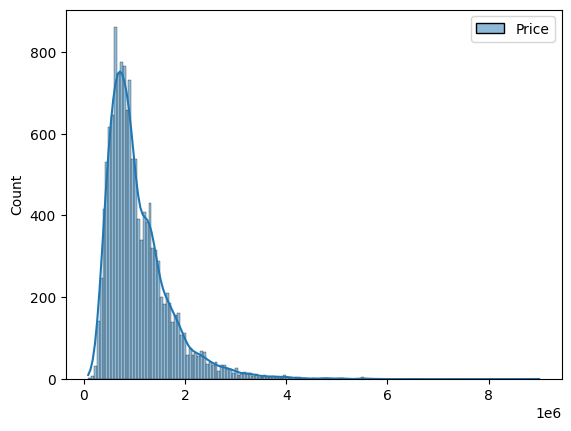

In [ ]:
lst_y = ['Price']

# Se grafica la variable Price mediante un histograma y un diagrama de caja
sb.histplot(df_replacecat[lst_y], kde=True)
plt.show()

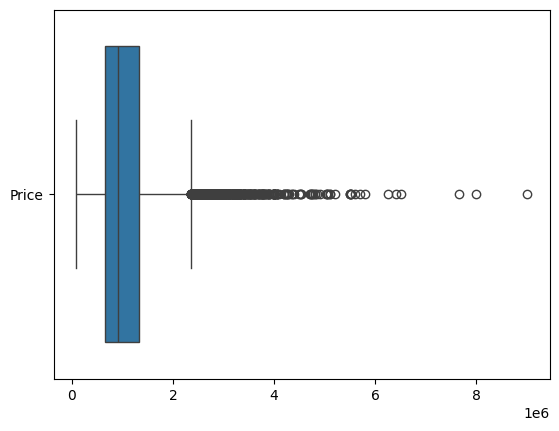

In [ ]:
sb.boxplot(df_replacecat[lst_y], orient='h')
plt.show()

<h3> Variables categóricas </h3>

#### Valores únicos de cada variable categórica

In [ ]:
for col in df_replacecat[lst_catvar]:
  lst_unique = df_replacecat[col].unique()
  if len(lst_unique)<10:
    print(f'{col}: {lst_unique}')
  else:
    print(f'La variable {col} tiene {len(lst_unique)} valores distintos')

La variable Suburb tiene 314 valores distintos
La variable Address tiene 13378 valores distintos
Type: ['h' 'u' 't']
Method: ['S' 'SP' 'PI' 'VB' 'SA']
La variable SellerG tiene 268 valores distintos
La variable Date tiene 58 valores distintos
La variable CouncilArea tiene 33 valores distintos
Regionname: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']
La variable Postcode tiene 198 valores distintos


#### Distribución de las variables categóricas

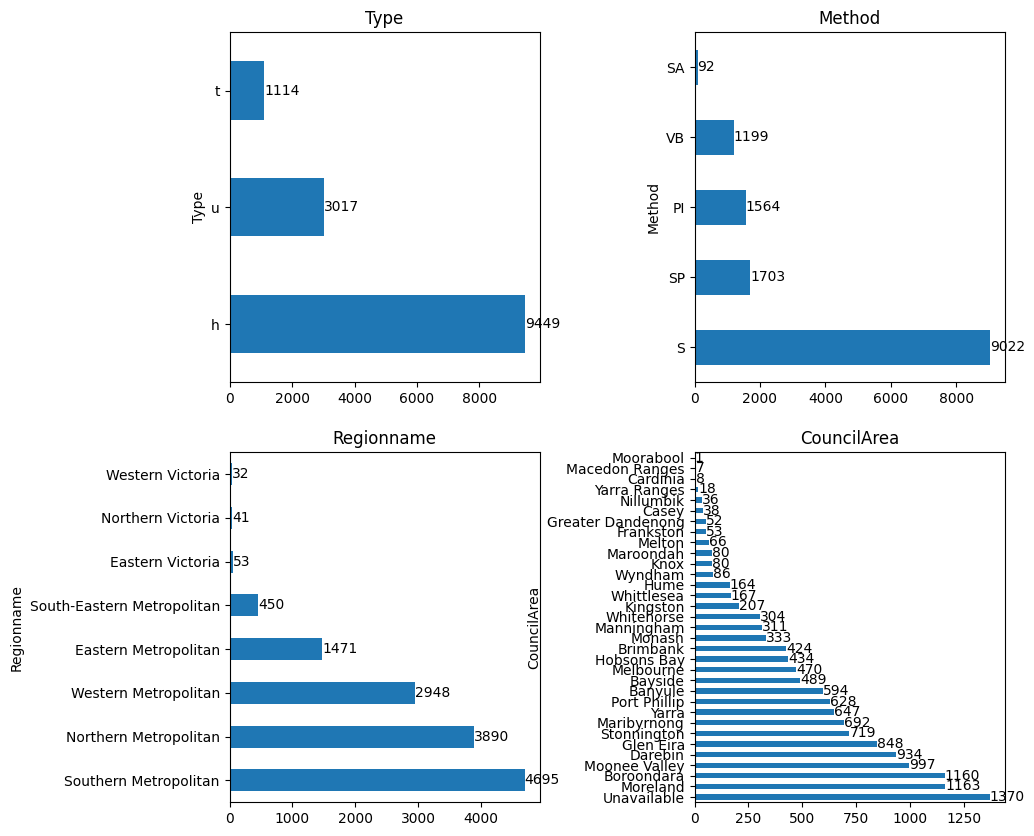

In [ ]:
# Se grafican 4 variables categóricas
# Se omiten las variables 'Suburb', 'Address', 'SellerG' y 'Date' porque tienen muchas categorias y
# no se apreciarían de manera correcta en un gráfico de barras.

lst_cat = ['Type', 'Method', 'Regionname', 'CouncilArea']

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

plt.subplots_adjust(
    wspace=0.5,
    hspace=0.2
)

for col, ax in zip(df_replacecat[lst_cat].select_dtypes(include='O'), axes.ravel()):
    df_replacecat[col].value_counts().plot.barh(ax=ax)
    ax.set_title(col)
    ax.bar_label(ax.containers[0])
plt.show()

#Análisis estadístico descriptivo

<h3> Variables numéricas </h3>

In [ ]:
# Verificar los rangos

df_replacecat[lst_contvar+lst_disvar].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearBuilt,13577.0,1.965661e+03,29.648035,1196.00000,1960.000000,1970.000000,1.980000e+03,2.018000e+03
Longtitude,13580.0,1.449952e+02,0.103916,144.43181,144.929600,145.000100,1.450583e+02,1.455264e+02
Lattitude,13580.0,-3.780920e+01,0.079260,-38.18255,-37.856822,-37.802355,-3.775640e+01,-3.740853e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.713752e+00,0.860212,1.00000,1.000000,2.000000,2.000000e+00,1.000000e+01


### Distribución de las variables numéricas

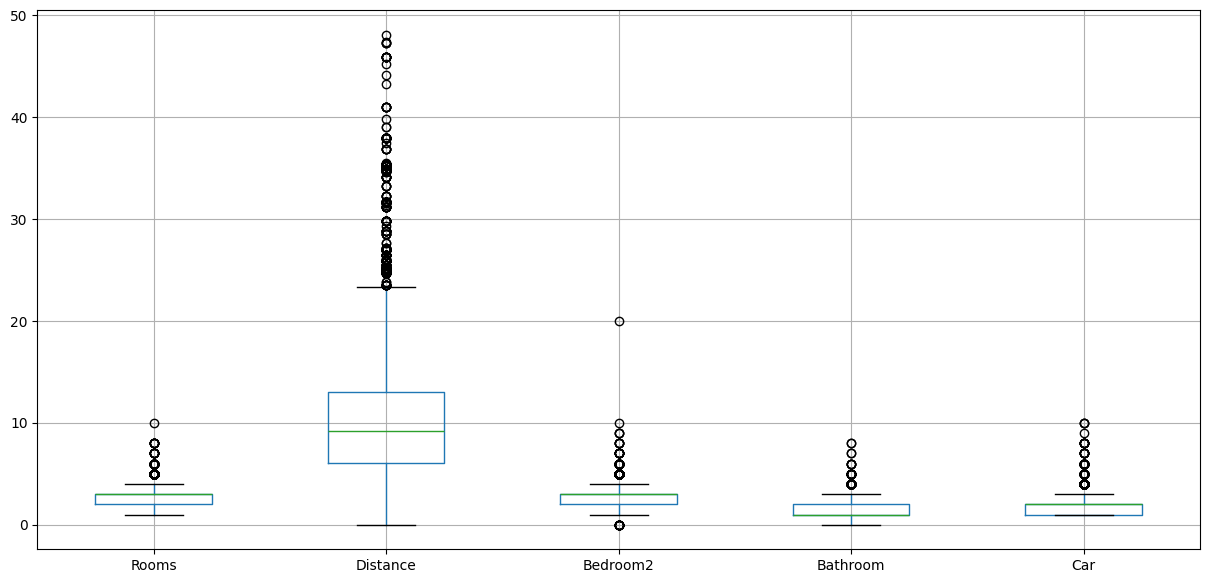

In [ ]:
# Dado que los diagramas de caja y bigote se incluyen en una sola figura, se
# omiten 'Price', ya que es la variable de salida; y el resto: 'Postcode', 'Landsize',
# 'YearBuilt', 'Lattitude', 'Longtitude' y 'Propertycount' se omiten porque su rango
# es muy grande

lst_num = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car']

# Se grafican los diagramas de caja de cada una de las variables numéricas

boxplot = df_replacecat[lst_num].boxplot(figsize=(15,7))

plt.show()

Se generan los histogramas de las variables numéricas

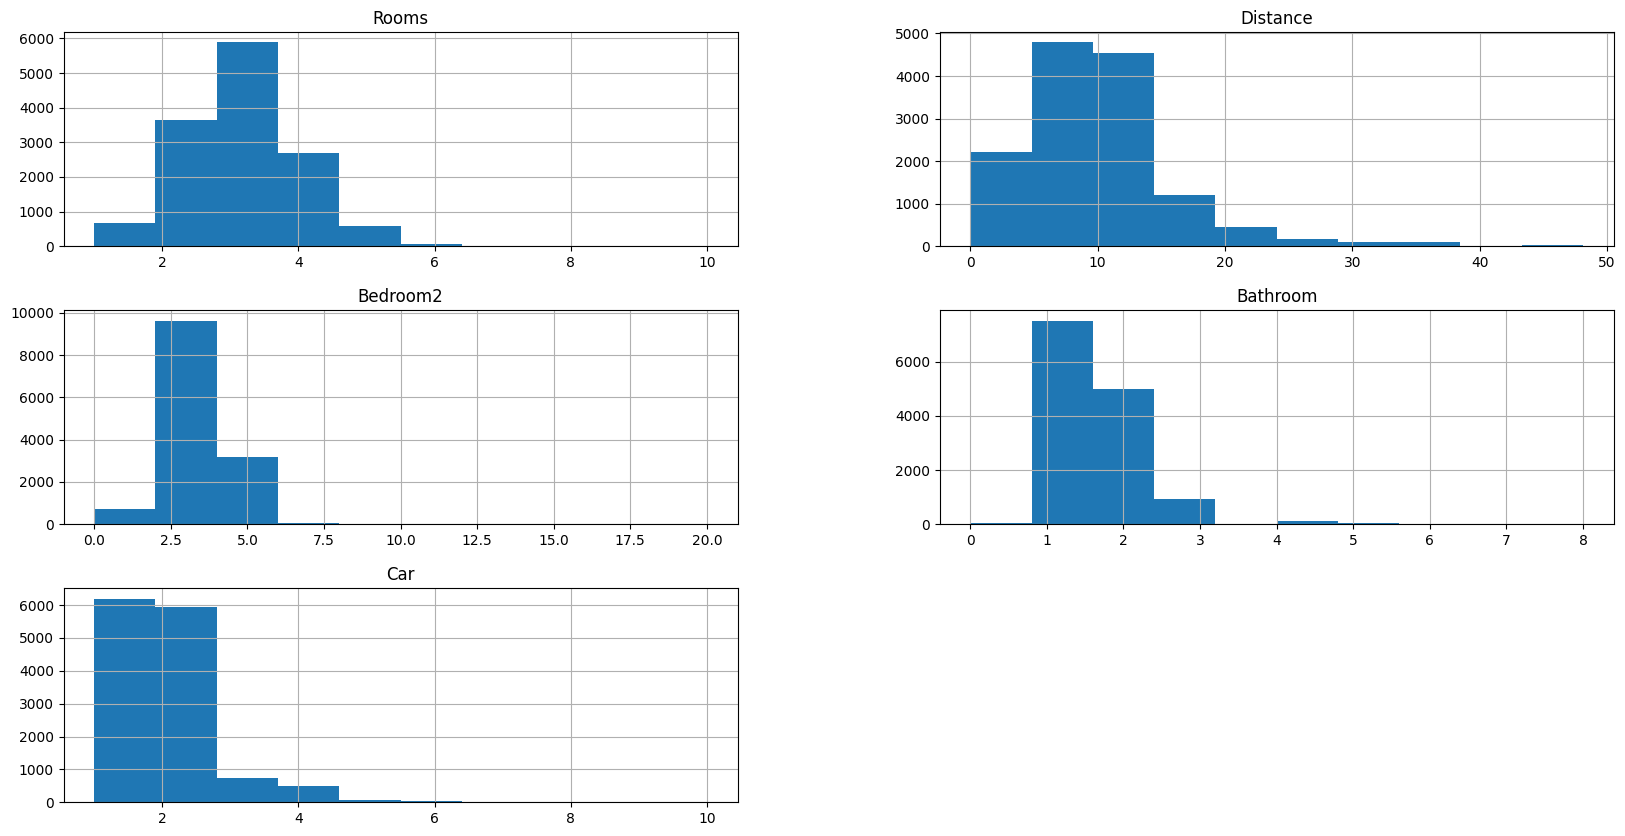

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10];
df_replacecat[lst_num].hist()
plt.show()

*Distance* y *Car* tienen una asimetría positiva

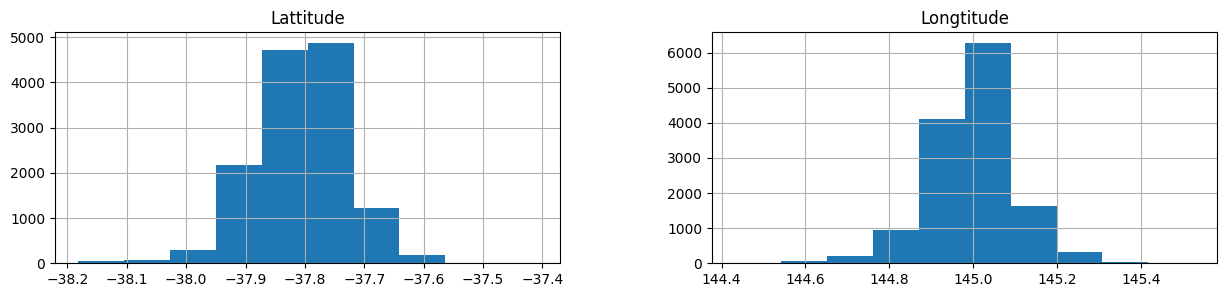

In [ ]:
plt.rcParams['figure.figsize'] = [15, 3];
df_replacecat[['Lattitude', 'Longtitude']].hist()
plt.show()

<h4> Correlación entre variables numéricas </h4>

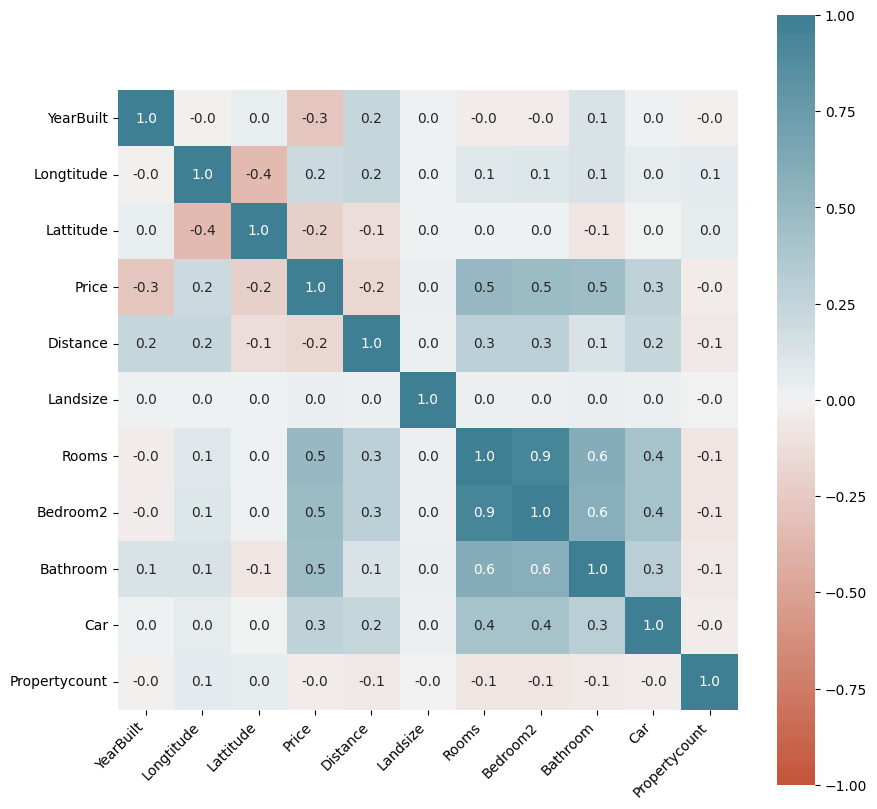

In [ ]:
df_numcat = df_replacecat[lst_contvar+lst_disvar]

corr= df_numcat.corr()
plt.figure(figsize=(10, 10))
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
    annot = True, fmt=".1f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Se puede observar que las variables Rooms, Bedroom2 y Bathroom tienen una correlación positiva mas alta con Price, siendo de 0.5. Por otro lado, YearBuild presenta la correlación negativa mas fuerte con Price, con un valor de -0.3. Además, Rooms, y Bedroom2 están altamente correlacionadas entre sí, mientras que, la variable *Landsize* no tiene correlación con ninguna variable.